In [2]:
import pandas as pd
import numpy as np
from scipy.stats import kstest,ttest_ind
import seaborn as sns
from matplotlib.ticker import MultipleLocator
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams.update({'font.size': 14, 'axes.linewidth': 2, 'xtick.major.width': 1.5, 'xtick.major.size': 7, 'ytick.major.width': 1.5, 'ytick.major.size': 7})
from matplotlib.backends.backend_pdf import PdfPages

In [3]:
oligo_table = "/data5/deepro/ukbiobank/papers/bmi_project/4_characterization/white_british_female/data/oligogenic/oligo_table.csv"
oligo_df = pd.read_csv(oligo_table)

# Violin plot

In [4]:
violin_df = oligo_df

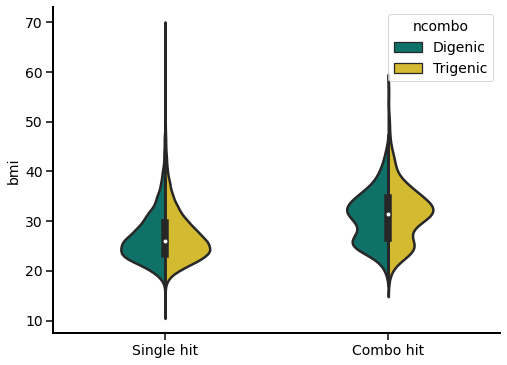

In [5]:
fig = plt.figure(figsize=(8,6))
sns_ax = sns.violinplot(
    data=violin_df, x="vtype", y="bmi", 
    hue="ncombo", split=True,
    width=0.4, linewidth=2.5,
    palette=["#008176", "#eecc16"],  # "#eecc16", "#c1272d"
    hue_order= ["Digenic", "Trigenic"],
    )

ax = plt.gca()
sns_ax.set_xlabel("")
ax.spines[['right', 'top']].set_visible(False)


In [10]:
single_hit_pheno_c2 = violin_df.loc[(violin_df.vtype=="Single hit")&(violin_df.ncombo=="Digenic")]
combo_hit_pheno_c2 = violin_df.loc[(violin_df.vtype=="Combo hit")&(violin_df.ncombo=="Digenic")]

single_hit_pheno_c3 = violin_df.loc[(violin_df.vtype=="Single hit")&(violin_df.ncombo=="Trigenic")]
combo_hit_pheno_c3 = violin_df.loc[(violin_df.vtype=="Combo hit")&(violin_df.ncombo=="Trigenic")]

In [9]:
ttest_ind(single_hit_pheno_c2.bmi, combo_hit_pheno_c2.bmi, alternative="less"), kstest(single_hit_pheno_c2.bmi, combo_hit_pheno_c2.bmi)

(Ttest_indResult(statistic=-8.613335454001088, pvalue=4.198783416369761e-18),
 KstestResult(statistic=0.3583936376012037, pvalue=6.472482964173922e-16))

In [11]:
ttest_ind(single_hit_pheno_c3.bmi, combo_hit_pheno_c3.bmi, alternative="less"), kstest(single_hit_pheno_c3.bmi, combo_hit_pheno_c3.bmi)

(Ttest_indResult(statistic=-15.928692002795813, pvalue=2.579363814089817e-57),
 KstestResult(statistic=0.4236935874703605, pvalue=2.5544359157685807e-51))